In [3]:
## Import packages
from scipy.io import loadmat
from sklearn import preprocessing
from tabulate import tabulate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from skimage.color import label2rgb
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm
import pandas as pd
import numpy as np
import statistics 
import math
import time
import sys

## Import DL
import keras 
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D , Conv1D, Flatten, MaxPooling1D
from keras.models import Sequential

In [2]:
## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
img = loadmat('/content/drive/My Drive/Major_Project/Data/PaviaU.mat')
img_gt = loadmat('/content/drive/My Drive/Major_Project/Data/PaviaU_gt.mat')
img_dr = np.load('/content/drive/My Drive/Major_Project/Supervised_Results/PaviaU/DR/img_orig_DR_22.npy')
img_dr_un = np.load('/content/drive/My Drive/Major_Project/unSupervised_Results/PaviaU/DR/Test0_DR_imgorig_22.npy')

In [9]:
img = img['paviaU']
gt = img_gt['paviaU_gt']
height, width, bands = img.shape[0], img.shape[1], img.shape[2]
img = np.reshape(img, [height*width, bands])
img_gt = np.reshape(gt, [height*width,])
img = preprocessing.normalize(img.astype('float32'))
img_dr = preprocessing.normalize(img_dr.astype('float32'))
img_dr_un = preprocessing.normalize(img_dr_un.astype('float32'))

In [ ]:
a = np.arange(height*width)
print(a[img_gt==3])

[ 98609  98610  98948 ... 162543 162544 162882]


# Pavia

1


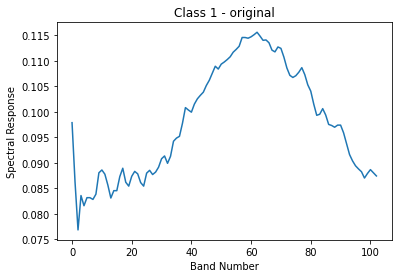

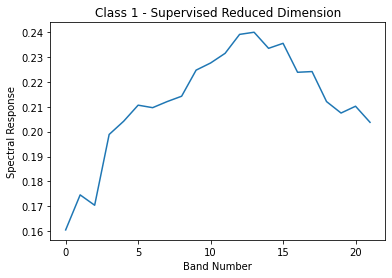

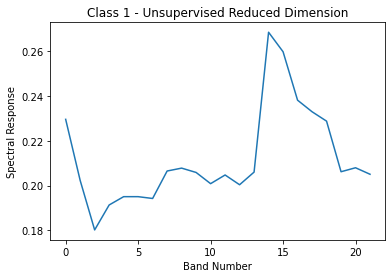

In [11]:
print(img_gt[1800])
plt.figure()
plt.plot(img[1800,:])
plt.title('Class 1 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass1.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr[1800,:])
plt.title('Class 1 - Supervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass1_DR.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[1800,:])
plt.title('Class 1 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass1_DR_un.png',dpi=300, bbox_inches='tight')

5


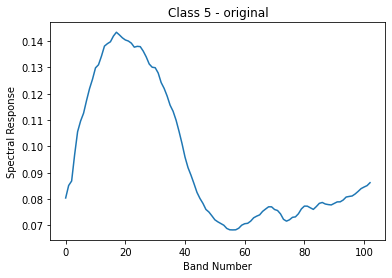

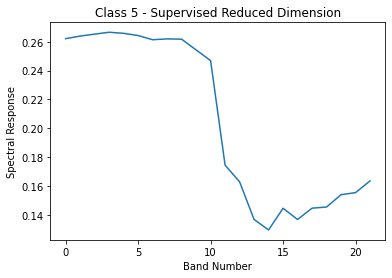

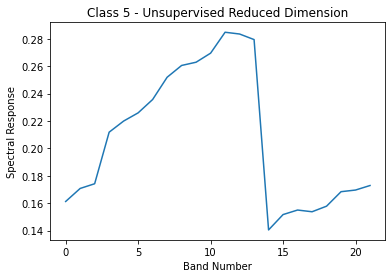

In [12]:
print(img_gt[49432])
plt.figure()
plt.plot(img[49432,:])
plt.title('Class 5 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass5.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr[49432,:])
plt.title('Class 5 - Supervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass5_DR.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[49432,:])
plt.title('Class 5 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass5_DR_un.png',dpi=300, bbox_inches='tight')

9


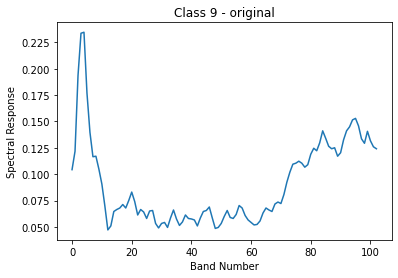

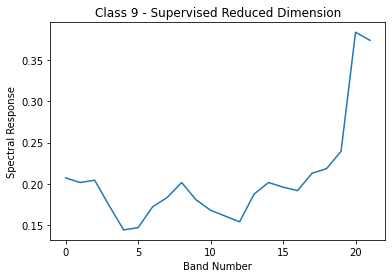

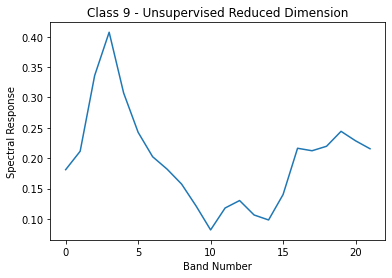

In [13]:
print(img_gt[112676])
plt.figure()
plt.plot(img[112676,:])
plt.title('Class 9 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass9.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr[112676,:])
plt.title('Class 9 - Supervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass9_DR.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[112676,:])
plt.title('Class 9 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass9_DR_un.png',dpi=300, bbox_inches='tight')

3


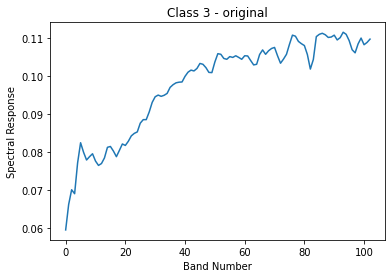

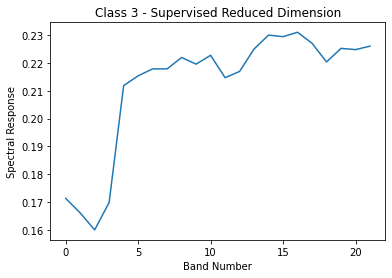

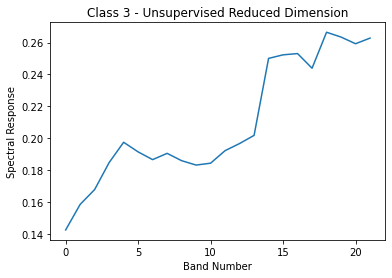

In [14]:
print(img_gt[98948])
plt.figure()
plt.plot(img[98948,:])
plt.title('Class 3 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass3.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr[98948,:])
plt.title('Class 3 - Supervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass3_DR.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[98948,:])
plt.title('Class 3 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/PUClass3_DR_un.png',dpi=300, bbox_inches='tight')

# Pavia - Unsupervised

1


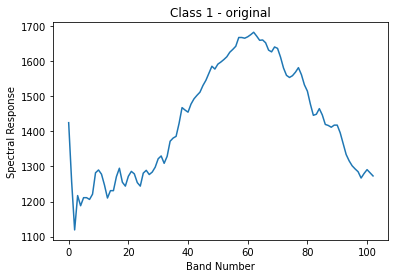

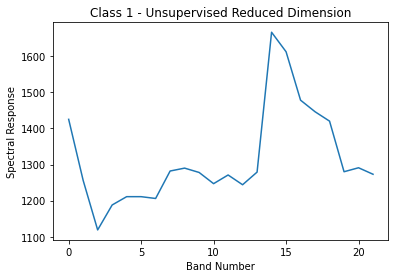

In [ ]:
print(img_gt[1800])
plt.figure()
plt.plot(img[1800,:])
plt.title('Class 1 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('PUClass1.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[1800,:])
plt.title('Class 1 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('PUClass1_DR.png',dpi=300, bbox_inches='tight')

5


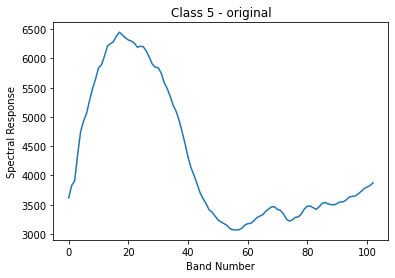

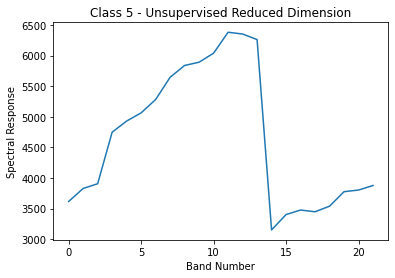

In [ ]:
print(img_gt[49432])
plt.figure()
plt.plot(img[49432,:])
plt.title('Class 5 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('PUClass5.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[49432,:])
plt.title('Class 5 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('PUClass5_DR.png',dpi=300, bbox_inches='tight')

9


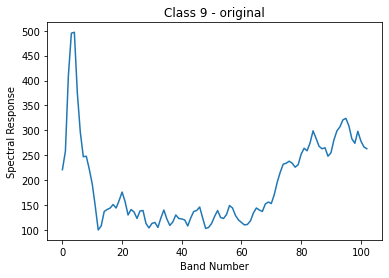

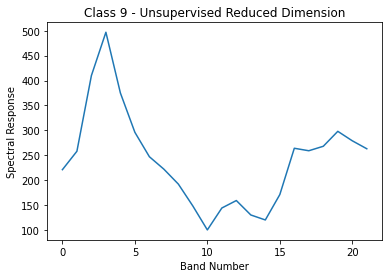

In [ ]:
print(img_gt[112676])
plt.figure()
plt.plot(img[112676,:])
plt.title('Class 9 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('PUClass9.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[112676,:])
plt.title('Class 9 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('PUClass9_DR.png',dpi=300, bbox_inches='tight')

3


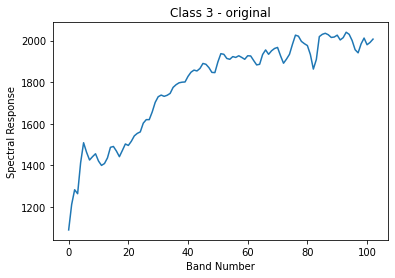

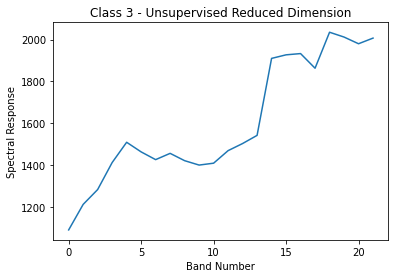

In [ ]:
print(img_gt[98948])
plt.figure()
plt.plot(img[98948,:])
plt.title('Class 3 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('PUClass3.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[98948,:])
plt.title('Class 3 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('PUClass3_DR.png',dpi=300, bbox_inches='tight')

# Indian Pines

In [17]:
img = loadmat('/content/drive/My Drive/Major_Project/Data/Indian_Pines.mat')
img_gt = loadmat('/content/drive/My Drive/Major_Project/Data/Indian_Pines_gt.mat')
img_dr = np.load('/content/drive/My Drive/Major_Project/Supervised_Results/Indian_Pines/DR/img_orig_DR_30.npy')
img_dr_un = np.load('/content/drive/My Drive/Major_Project/unSupervised_Results/Indian_Pines/DR/Test0_DR_imgorig_30.npy')

In [18]:
img = img['indian_pines_corrected']
gt = img_gt['indian_pines_gt']
height, width, bands = img.shape[0], img.shape[1], img.shape[2]
img = np.reshape(img, [height*width, bands])
img_gt = np.reshape(gt, [height*width,])
img = preprocessing.normalize(img.astype('float32'))
img_dr = preprocessing.normalize(img_dr.astype('float32'))
img_dr_un = preprocessing.normalize(img_dr_un.astype('float32'))

In [ ]:
a = np.arange(height*width)
print(a[img_gt==9])

[ 8867  8868  9012  9013  9157  9158  9302  9303  9447  9448  9592  9593
  9737  9738  9882  9883 10027 10028 10172 10173]


1


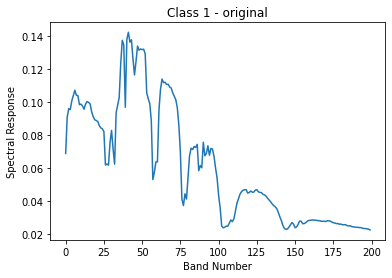

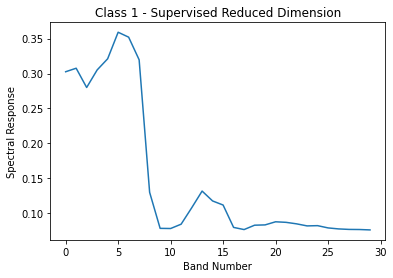

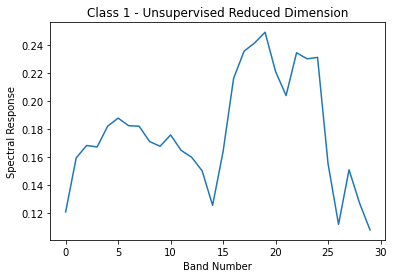

In [19]:
print(img_gt[9376])
plt.figure()
plt.plot(img[9376,:])
plt.title('Class 1 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass1.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr[9376,:])
plt.title('Class 1 - Supervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass1_DR.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[9376,:])
plt.title('Class 1 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass1_DR_un.png',dpi=300, bbox_inches='tight')

5


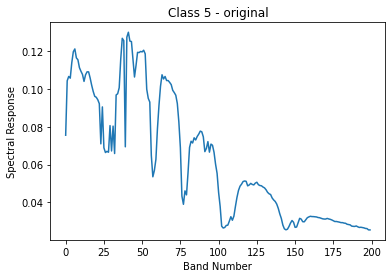

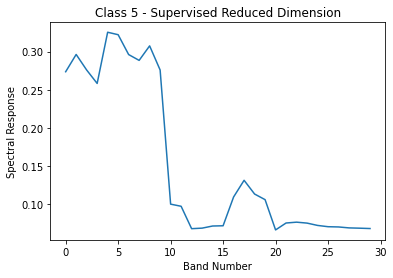

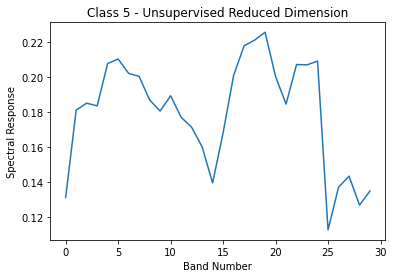

In [20]:
print(img_gt[895])
plt.figure()
plt.plot(img[895,:])
plt.title('Class 5 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass5.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr[895,:])
plt.title('Class 5 - Supervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass5_DR.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[895,:])
plt.title('Class 5 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass5_DR_un.png',dpi=300, bbox_inches='tight')

9


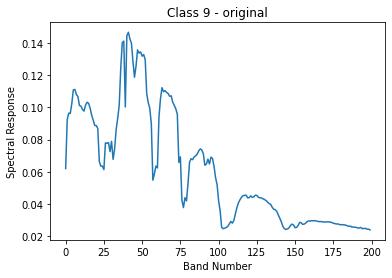

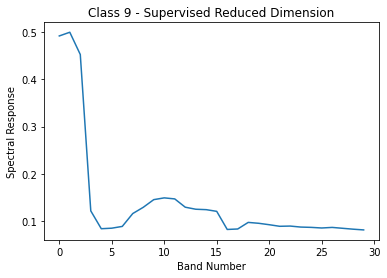

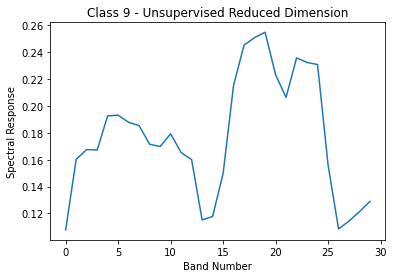

In [21]:
print(img_gt[9157])
plt.figure()
plt.plot(img[9157,:])
plt.title('Class 9 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass9.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr[9157,:])
plt.title('Class 9 - Supervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass9_DR.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[9157,:])
plt.title('Class 9 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass9_DR_un.png',dpi=300, bbox_inches='tight')

3


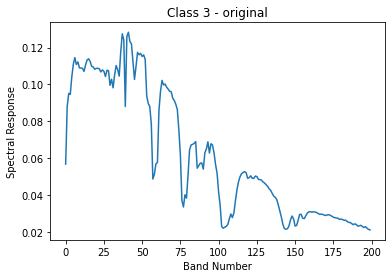

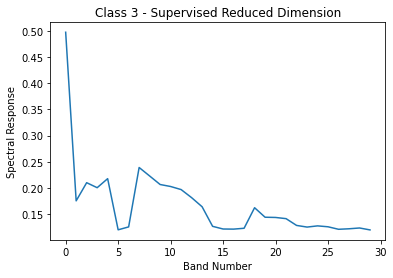

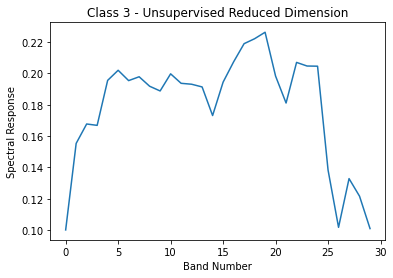

In [22]:
print(img_gt[18455])
plt.figure()
plt.plot(img[18455,:])
plt.title('Class 3 - original')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass3.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr[18455,:])
plt.title('Class 3 - Supervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass3_DR.png',dpi=300, bbox_inches='tight')
plt.figure()
plt.plot(img_dr_un[18455,:])
plt.title('Class 3 - Unsupervised Reduced Dimension')
plt.ylabel('Spectral Response')
plt.xlabel('Band Number')
plt.savefig('/content/drive/My Drive/Major_Project/Figures/IPClass3_DR_un.png',dpi=300, bbox_inches='tight')